In [185]:
from pycaret.regression import *

In [186]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
import pickle
import os
from sys import platform

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

In [187]:
import pycaret

In [188]:
import scipy

# Instructions

1. Load the `train.csv` file
2. Explore the data, understand it
3. Process it for future training
4. Do train, test, split for your `train.csv` file
5. `fit/train` a model from your cleaned_train_df
-----
5. Load the `train.csv` file
6. Apply the same processing you did to `train.csv` into `test.csv`
7. `predict` the price for that file
8. Only keep the columns you need
9. Export
-----
10. Repeat! 🚀🔥

# Import the csv files

In [189]:
pwd

'C:\\Users\\Edgard_Cuadra\\OneDrive\\Desktop\\Ironhack\\Teachers_Notes\\lectures - Copy\\week-7'

In [190]:
df_train = pd.read_csv(".\\diamonds-databcn0722\\train.csv")
df_test = pd.read_csv(".\\diamonds-databcn0722\\test.csv")

In [191]:
print(df_train.shape[0])
df_train.sample(5)

40455


,id,carat,cut,color,clarity,depth,table,x,y,z,price
15843,15843,0.35,Premium,E,SI1,61.2,58.0,4.59,4.53,2.79,6.669
10392,10392,1.04,Ideal,H,VS1,62.7,55.0,6.43,6.49,4.05,8.626
29233,29233,0.70,Ideal,E,VS2,61.3,57.0,5.73,5.75,3.52,8.162
18358,18358,1.43,Ideal,H,VVS2,61.6,54.0,7.25,7.29,4.48,9.223
7923,7923,1.20,Very Good,J,SI2,61.8,60.0,6.76,6.83,4.20,8.429


Dependent_Variables = ['price']

Independent_Variables = ['id', 'carat', 'cut', 'color','clarity', 'depth',
                         'table', 'x', 'y', 'z', 'price']

In [192]:
# we need to transform both tables, the Train CVS and the Test CVS

In [193]:
df_train.drop("id", axis = 1, inplace = True)

In [194]:
df_test.drop("id", axis = 1, inplace = True)

In [195]:
df_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [196]:
# variables que debemos pasar a dummines

In [197]:
df_train.cut.unique()

array(['Premium', 'Ideal', 'Very Good', 'Fair', 'Good'], dtype=object)

# Cleaning, processing, feature selection, etc

### Cut

In [198]:
cut_value = {
    'Premium':4, 
    'Ideal':5, 
    'Very Good':3, 
    'Fair':1, 
    'Good':2    
}

In [199]:
df_train["cut"] = df_train.cut.apply(lambda x: cut_value[x] )

In [200]:
df_test["cut"] = df_test.cut.apply(lambda x: cut_value[x] )

### Color

In [201]:
df_train.color.unique()

array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)

In [202]:
color_value = {
    'D':7, 
    'E':6, 
    'F':5, 
    'G':4, 
    'H':3, 
    'I':2, 
    'J':1
}

In [203]:
df_train["color"] = df_train.color.apply(lambda x: color_value[x] )

In [204]:
df_test["color"] = df_test.color.apply(lambda x: color_value[x] )

### Clarity

In [205]:
df_train.clarity.unique()

array(['SI2', 'VVS2', 'VS2', 'VS1', 'SI1', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [206]:
clarity_value = {
    'SI2':2,
    'VVS2':6, 
    'VS2':4,
    'VS1':5,
    'SI1':3,
    'VVS1':7,
    'IF':8,
    'I1':1    
}

In [207]:
df_train["clarity"] = df_train.clarity.apply(lambda x: clarity_value[x] )

In [208]:
df_test["clarity"] = df_test.clarity.apply(lambda x: clarity_value[x] )

In [209]:
df_train.sample(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
8320,0.71,5,6,5,61.8,55.0,5.72,5.77,3.55,8.111
27150,0.35,5,5,3,62.5,54.0,4.50,4.52,2.82,6.368
8214,0.52,5,4,6,61.9,55.0,5.14,5.16,3.19,7.555
8830,0.73,5,7,4,62.6,55.0,5.71,5.76,3.59,8.226
24330,0.51,5,4,6,61.6,56.0,5.12,5.14,3.16,7.510


In [210]:
df_train.corr()

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,-0.131069,-0.293307,-0.353255,0.023585,0.185478,0.974648,0.944419,0.947469,0.920064
cut,-0.131069,1.000000,0.017590,0.188554,-0.215352,-0.431195,-0.122895,-0.117832,-0.145396,-0.084878
color,-0.293307,0.017590,1.000000,-0.023444,-0.047839,-0.028516,-0.272222,-0.263498,-0.268702,-0.157426
clarity,-0.353255,0.188554,-0.023444,1.000000,-0.066904,-0.161419,-0.371745,-0.355509,-0.364293,-0.213649
depth,0.023585,-0.215352,-0.047839,-0.066904,1.000000,-0.299203,-0.029867,-0.033960,0.089474,-0.003292
table,0.185478,-0.431195,-0.028516,-0.161419,-0.299203,1.000000,0.200374,0.186788,0.153726,0.162804
x,0.974648,-0.122895,-0.272222,-0.371745,-0.029867,0.200374,1.000000,0.967315,0.965496,0.957668
y,0.944419,-0.117832,-0.263498,-0.355509,-0.033960,0.186788,0.967315,1.000000,0.941176,0.928909
z,0.947469,-0.145396,-0.268702,-0.364293,0.089474,0.153726,0.965496,0.941176,1.000000,0.930014
price,0.920064,-0.084878,-0.157426,-0.213649,-0.003292,0.162804,0.957668,0.928909,0.930014,1.000000


<AxesSubplot:>

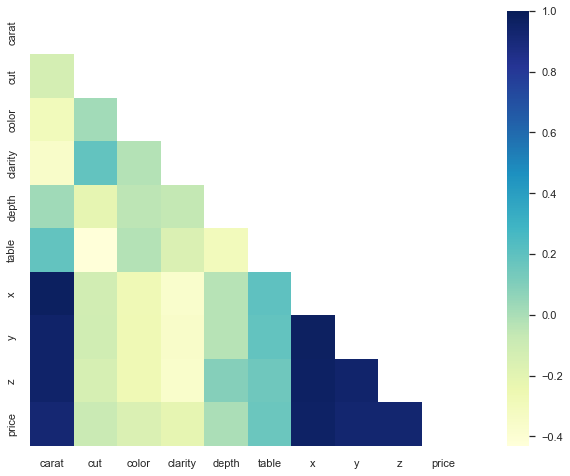

In [211]:
corr = df_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           cmap="YlGnBu", mask=mask, vmax=1, square=True)

In [212]:
# null hypothesis: x comes from a normal distribution
# if P< 0.5 "The null hypothesis can be rejected, 
# its not a normal distribution"

In [213]:
from scipy import stats

In [214]:
k2,p= stats.normaltest(a=df_train["carat"],nan_policy="omit")
print("p = {:g}".format(p))
print("k2 = {:g}".format(k2))

p = 0
k2 = 6797.69


In [215]:
k2,p= stats.normaltest(a=df_train["depth"],nan_policy="omit")
print("p = {:g}".format(p))
print("k2 = {:g}".format(k2))

p = 0
k2 = 5249.1


In [216]:
k2,p= stats.normaltest(a=df_train["table"],nan_policy="omit")
print("p = {:g}".format(p))
print("k2 = {:g}".format(k2))

p = 0
k2 = 6744.1


In [217]:
k2,p= stats.normaltest(a=df_train["x"],nan_policy="omit")
print("p = {:g}".format(p))
print("k2 = {:g}".format(k2))

p = 0
k2 = 2234.62


In [218]:
k2,p= stats.normaltest(a=df_train["z"],nan_policy="omit")
print("p = {:g}".format(p))
print("k2 = {:g}".format(k2))

p = 0
k2 = 25242.4


In [219]:
k2,p= stats.normaltest(a=df_train["y"],nan_policy="omit")
print("p = {:g}".format(p))
print("k2 = {:g}".format(k2))

p = 0
k2 = 34696.8


In [220]:
k2,p= stats.normaltest(a=df_train["cut"],nan_policy="omit")
print("p = {:g}".format(p))
print("k2 = {:g}".format(k2))

p = 0
k2 = 3269.02


In [221]:
k2,p= stats.normaltest(a=df_train["color"],nan_policy="omit")
print("p = {:g}".format(p))
print("k2 = {:g}".format(k2))

p = 0
k2 = 5020.53


In [222]:
k2,p= stats.normaltest(a=df_train["clarity"],nan_policy="omit")
print("p = {:g}".format(p))
print("k2 = {:g}".format(k2))

p = 0
k2 = 2227.24


<AxesSubplot:xlabel='carat', ylabel='Count'>

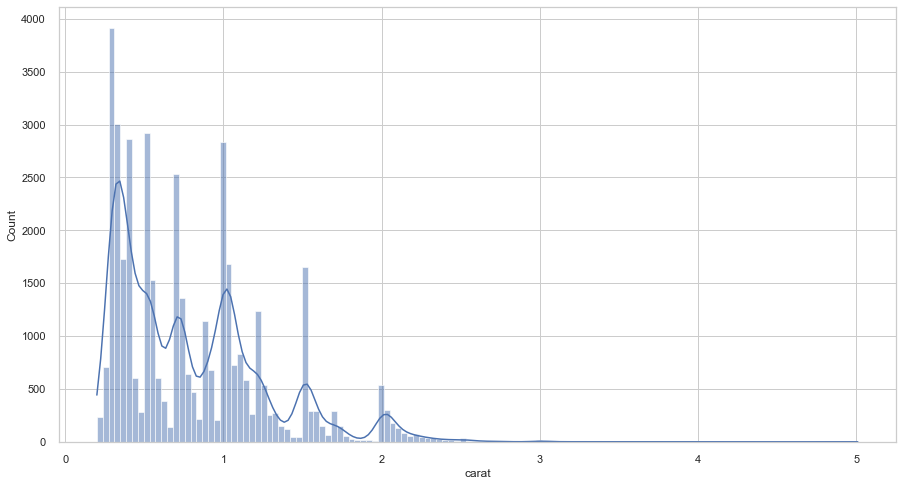

In [223]:
sns.histplot(data=df_train, x="carat",kde=True)

<AxesSubplot:xlabel='depth', ylabel='Count'>

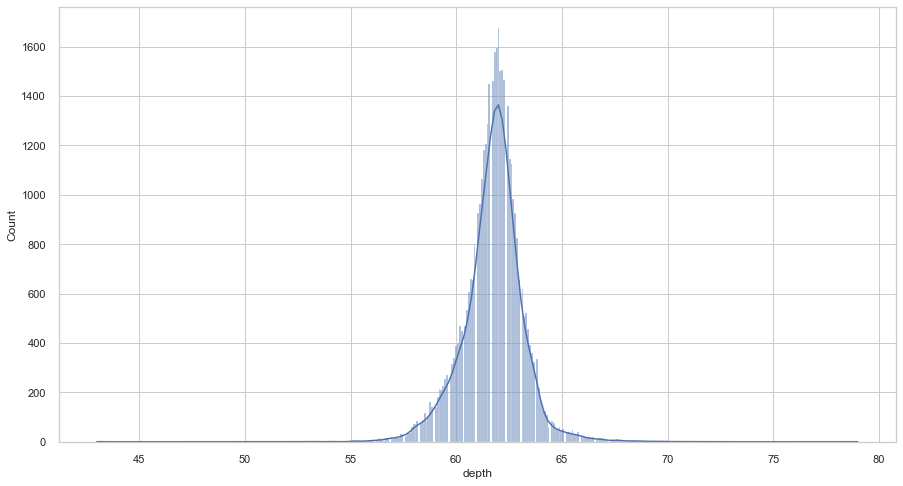

In [224]:
sns.histplot(data=df_train, x="depth",kde=True)

<AxesSubplot:xlabel='table', ylabel='Count'>

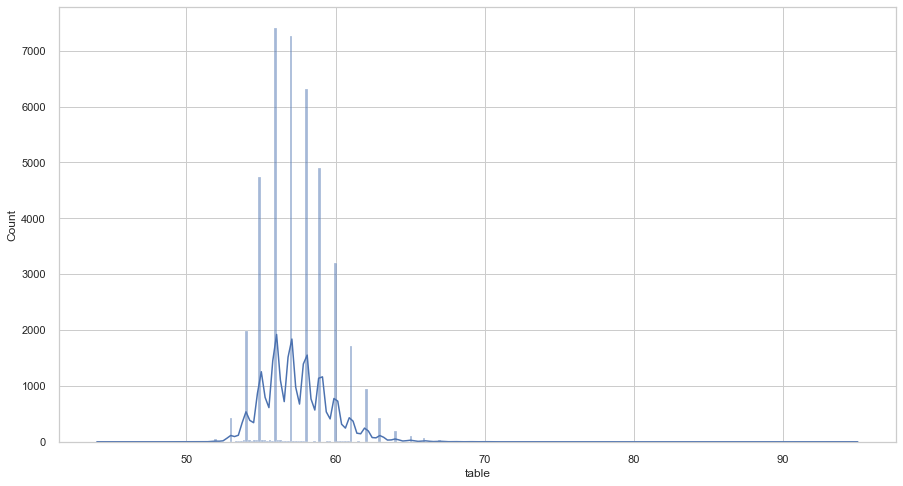

In [225]:
sns.histplot(data=df_train, x="table",kde=True)

<AxesSubplot:xlabel='x', ylabel='Count'>

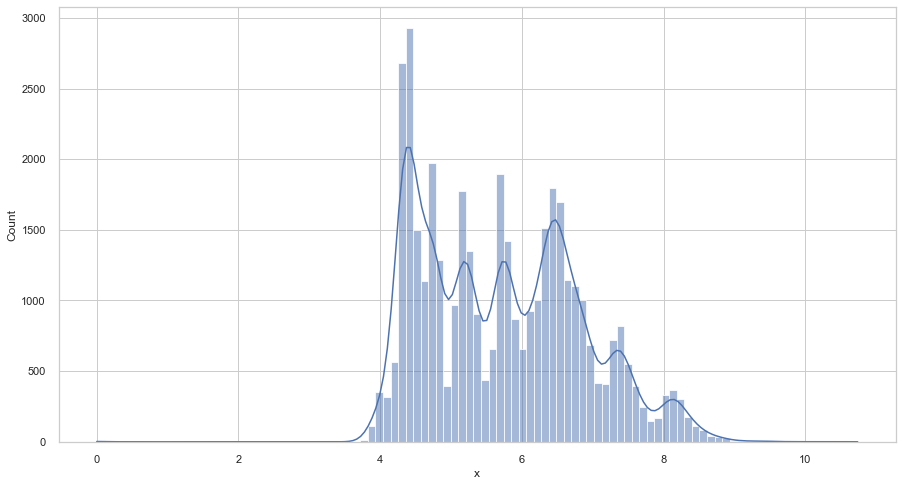

In [226]:
sns.histplot(data=df_train, x="x",kde=True)

<AxesSubplot:xlabel='y', ylabel='Count'>

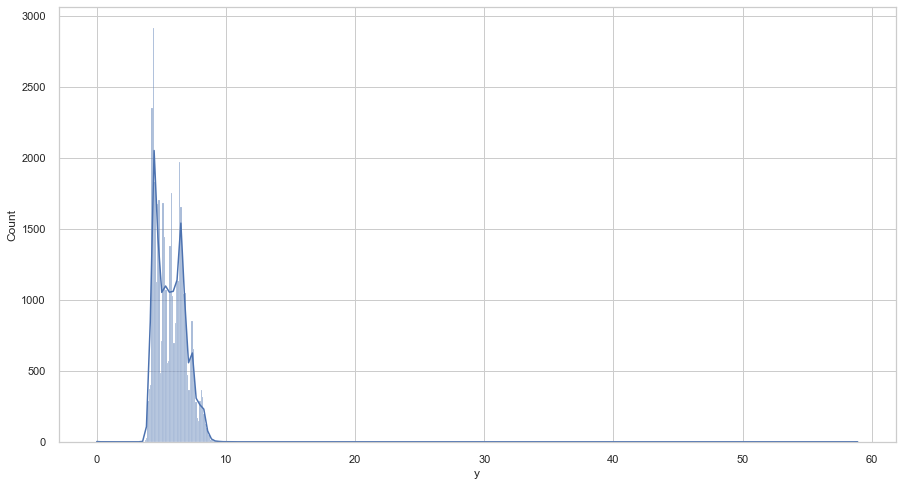

In [227]:
sns.histplot(data=df_train, x="y",kde=True)

<AxesSubplot:xlabel='z', ylabel='Count'>

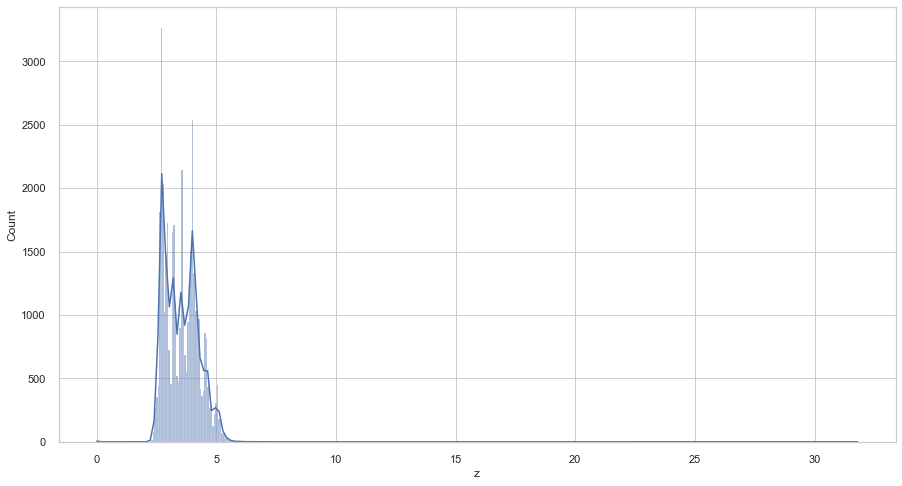

In [228]:
sns.histplot(data=df_train, x="z",kde=True)

<AxesSubplot:xlabel='cut', ylabel='Count'>

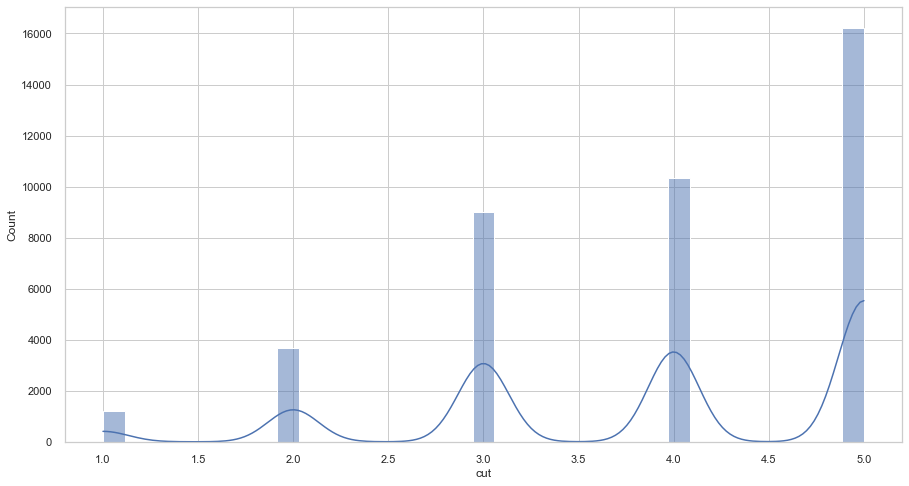

In [229]:
sns.histplot(data=df_train, x="cut",kde=True)

<AxesSubplot:xlabel='color', ylabel='Count'>

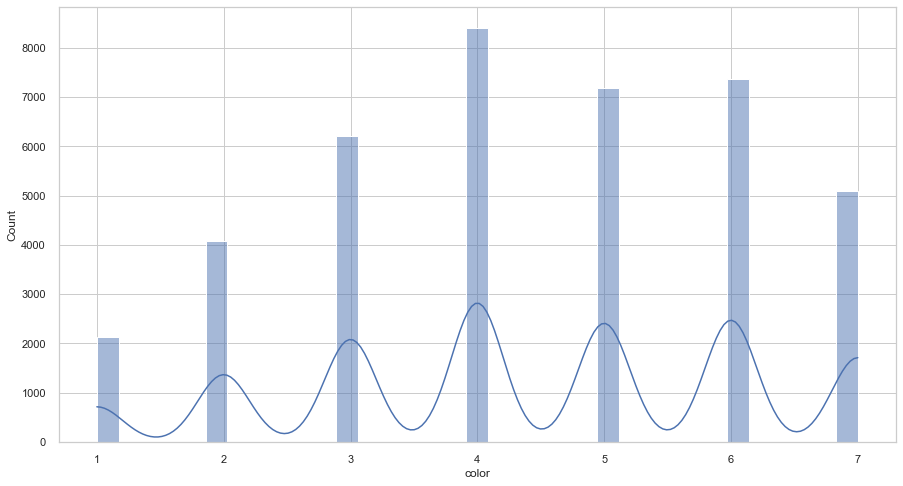

In [230]:
sns.histplot(data=df_train, x="color",kde=True)

<AxesSubplot:xlabel='clarity', ylabel='Count'>

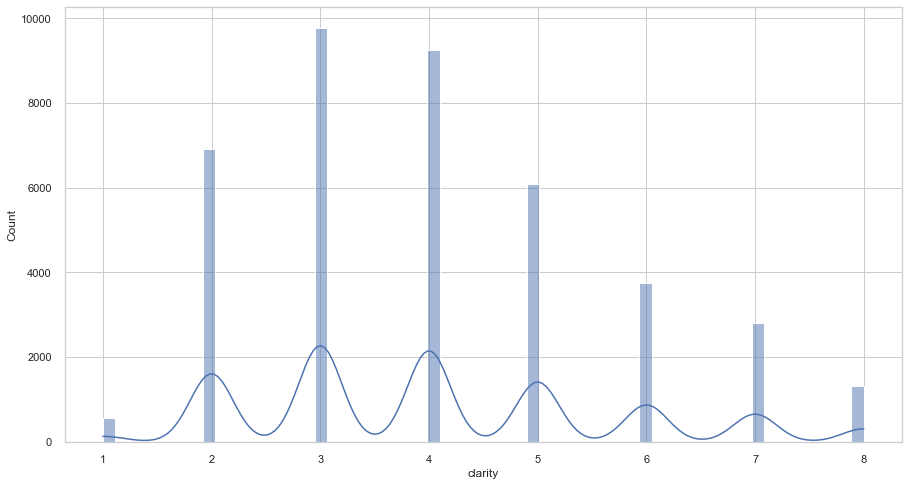

In [231]:
sns.histplot(data=df_train, x="clarity",kde=True)

In [232]:
#According to our test we can now use normalize before we run our models.

In [233]:
df_train.sample(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
30883,1.14,4,4,3,62.3,59.0,6.69,6.66,4.16,8.639
23235,0.37,5,5,6,61.6,57.0,4.59,4.63,2.84,6.824
5719,0.32,5,3,5,62.7,56.0,4.42,4.39,2.76,6.510
14398,2.30,5,2,2,61.8,57.0,8.45,8.48,5.23,9.692
34711,0.35,5,2,4,61.4,55.0,4.54,4.58,2.80,6.232


In [234]:
# drop outliers.

In [235]:
df_train = df_train[(df_train["depth"]<75)&(df_train["depth"]>45)]
df_train = df_train[(df_train["table"]<80)&(df_train["table"]>40)]
df_train = df_train[(df_train["x"]<30)]
df_train = df_train[(df_train["y"]<30)]
df_train = df_train[(df_train["z"]<30)&(df_train["z"]>2)]

In [1]:
# Standarize
# in this case Standarize gave a better prediction than normalize

In [237]:
from sklearn.preprocessing import StandardScaler

In [238]:
scaler = StandardScaler()

In [239]:
min_max = MinMaxScaler()

In [240]:
df_train["depth"] = scaler.fit_transform(df_train["depth"].values.reshape(-1,1))

In [241]:
df_train["table"] = scaler.fit_transform(df_train["table"].values.reshape(-1,1))

In [242]:
df_train["carat"] = scaler.fit_transform(df_train["carat"].values.reshape(-1,1))

In [243]:
df_train["x"] = scaler.fit_transform(df_train["x"].values.reshape(-1,1))

In [244]:
df_train["z"] = scaler.fit_transform(df_train["z"].values.reshape(-1,1))

In [245]:
df_train["y"] = scaler.fit_transform(df_train["y"].values.reshape(-1,1))

In [246]:
df_train.sample(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
14102,-0.856188,5,4,6,0.248088,-0.651871,-0.943970,-0.925483,-0.906337,6.787
36177,2.592048,4,2,3,-0.384421,0.246924,2.209887,2.179744,2.124693,9.728
19151,0.468439,3,7,3,0.740040,-0.651871,0.588413,0.636105,0.710212,8.707
4889,0.447414,1,7,6,2.567290,-0.202473,0.419138,0.384815,0.724646,9.073
35568,-0.961317,5,3,5,0.529203,-0.202473,-1.157790,-1.140874,-1.093972,6.390


In [247]:
# we do the same for the test df

In [248]:
df_test["depth"] = scaler.fit_transform(df_test["depth"].values.reshape(-1,1))

In [249]:
df_test["table"] = scaler.fit_transform(df_test["table"].values.reshape(-1,1))

In [250]:
df_test["carat"] = scaler.fit_transform(df_test["carat"].values.reshape(-1,1))

In [251]:
df_test["x"] = scaler.fit_transform(df_test["x"].values.reshape(-1,1))

In [252]:
df_test["z"] = scaler.fit_transform(df_test["z"].values.reshape(-1,1))

In [253]:
df_test["y"] = scaler.fit_transform(df_test["y"].values.reshape(-1,1))

In [254]:
df_test["depth"] = scaler.fit_transform(df_test["depth"].values.reshape(-1,1))

In [255]:
df_test.sample(5)

,carat,cut,color,clarity,depth,table,x,y,z
149,-0.617355,5,4,6,-1.167962,-0.659595,-0.465378,-0.497995,-0.598792
9171,0.450614,5,6,3,0.029235,-0.659595,0.650509,0.698464,0.677445
12173,0.215661,4,6,3,-0.322882,1.130774,0.407533,0.363093,0.343883
48,0.920521,5,3,4,0.310928,-1.107188,1.001473,0.970386,1.025509
4900,-1.065903,5,4,6,0.310928,-1.107188,-1.302293,-1.277506,-1.251413


In [256]:
df_test.describe()

,carat,cut,color,clarity,depth,table,x,y,z
count,1.348500e+04,13485.000000,13485.000000,13485.000000,1.348500e+04,1.348500e+04,1.348500e+04,1.348500e+04,1.348500e+04
mean,-8.219849e-17,3.893956,4.398962,4.058880,2.002271e-17,2.884324e-15,-5.817124e-16,-3.467090e-16,2.971792e-16
std,1.000037e+00,1.116752,1.693856,1.649305,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00
min,-1.279497e+00,1.000000,1.000000,1.000000,-7.717331e+00,-6.478296e+00,-5.162899e+00,-5.202253e+00,-5.138133e+00
25%,-8.523087e-01,3.000000,3.000000,3.000000,-4.637286e-01,-6.595955e-01,-9.063329e-01,-9.058785e-01,-9.033481e-01
50%,-1.901675e-01,4.000000,4.000000,4.000000,9.965802e-02,-2.120031e-01,-2.442265e-02,-1.759850e-02,-1.868411e-02
75%,5.146925e-01,5.000000,6.000000,5.000000,5.221980e-01,6.831816e-01,7.225013e-01,7.256562e-01,7.209530e-01
max,7.114745e+00,5.000000,7.000000,8.000000,1.214205e+01,6.949475e+00,3.962171e+00,3.952469e+00,4.187095e+00


In [257]:
columns_to_drop = ["x", "y","z"]

In [258]:
df_train.drop(columns_to_drop, axis = 1, inplace = True)

In [259]:
df_test.drop(columns_to_drop, axis = 1, inplace = True)

In [260]:
df_train.sample(5)

,carat,cut,color,clarity,depth,table,price
37357,-0.624904,5,3,6,-0.103306,-0.202473,7.519
27835,-0.435671,5,6,3,0.177809,-1.101269,7.417
12144,-0.435671,3,3,8,-0.033027,-0.651871,7.748
19421,-0.814136,2,6,6,0.950876,0.246924,6.966
37101,0.426388,4,4,4,0.810319,-0.651871,8.734


In [261]:
df_test.sample(5)

,carat,cut,color,clarity,depth,table
167,-0.062011,2,3,6,1.789818,0.190830
5808,-0.959106,5,4,7,-0.534152,-0.659595
4705,-0.617355,5,6,4,0.310928,-0.212003
2142,-0.617355,5,5,6,-0.393305,-0.659595
1385,2.586554,3,3,4,1.015161,0.235589


In [262]:
df_train.describe()

,carat,cut,color,clarity,depth,table,price
count,4.042800e+04,40428.000000,40428.000000,40428.000000,4.042800e+04,4.042800e+04,40428.000000
mean,-3.427225e-17,3.907910,4.408232,4.049174,-1.317724e-15,2.390269e-17,7.783249
std,1.000012e+00,1.116201,1.703725,1.646291,1.000012e+00,1.000012e+00,1.016697
min,-1.255678e+00,1.000000,1.000000,1.000000,-7.552863e+00,-6.044643e+00,5.787000
25%,-8.351618e-01,3.000000,3.000000,3.000000,-5.249791e-01,-6.518711e-01,6.851000
50%,-2.043871e-01,4.000000,4.000000,4.000000,3.725154e-02,-2.024735e-01,7.779000
75%,5.104910e-01,5.000000,6.000000,5.000000,5.292034e-01,6.963218e-01,8.580000
max,8.857744e+00,5.000000,7.000000,8.000000,8.330154e+00,9.684275e+00,9.842000


In [166]:
df_train.shape

(40428, 7)

In [77]:
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

carat      0.133056
cut        2.000000
color      3.000000
clarity    2.000000
depth      0.066372
table      0.085714
price      1.729000
dtype: float64


In [153]:
df_train.to_csv("df_train.csv", index=False)

In [154]:
df_test.to_csv("df_test.csv", index=False)

# Train on train.csv

![](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/4_train-test-split.jpg)

## Train, test split

In [77]:
X = df_train.iloc[:,:-1]
y = df_train['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

## Fit

In [78]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn import metrics
import numpy as np

In [72]:
models = {"ridge":Ridge(),
         "lasso" :Lasso(),
          "SGD":SGDRegressor(),
          "Kneighbor":KNeighborsRegressor(),
          "GBR": GradientBoostingRegressor(),
          "lr": LinearRegression(),
          "svr":SVR(),
         }

In [ ]:
for name, model in models.items():
    print(f"Training:{name}")
    model.fit(X_train,y_train)

In [ ]:
for name,model in models.items():
    y_pred = model.predict(X_test)
    print(f"MAE for {name}: ", metrics.mean_absolute_error(y_test, y_pred))
    print(f"MSE for {name}: ", metrics.mean_squared_error(y_test, y_pred))
    print(f"RMSE for {name}: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print(f"R2 for {name}: ", metrics.r2_score(y_test, y_pred))
    print("____________________________________")

# Applying same cleaning & processing to my `test.csv`

In [184]:
model = GradientBoostingRegressor().fit(X_train,y_train)

In [185]:
y_pred = model.predict(df_test)

In [186]:
y_pred

array([7.86768535, 9.36902426, 9.72925259, ..., 8.30705849, 9.43240603,
       9.28999464])

In [187]:
# test for XGBRegressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model2 = XGBRegressor().fit(X_train,y_train)

In [ ]:
y_pred2 = model2.predict(df_test)

In [ ]:
y_pred2

In [ ]:
df_test2 ['price'] = y_pred2
df_submission2 = df_test2[["id", "price"]] 

In [ ]:
df_submission2.sample(5)

In [ ]:
df_submission2.to_csv("my_submission2.csv", index=False)

# Predict on the `test.csv`

In [263]:
df_test2 = pd.read_csv(".\\diamonds-databcn0722\\test.csv")

In [264]:
df_test2

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.32,Ideal,I,SI1,60.5,58.0,4.43,4.49,2.70
1,1,1.24,Premium,I,SI1,62.9,60.0,6.80,6.74,4.26
2,2,1.66,Premium,D,SI1,62.0,59.0,7.55,7.60,4.70
3,3,0.75,Premium,D,SI2,60.6,56.0,5.94,5.90,3.59
4,4,1.50,Fair,E,SI2,64.8,55.0,7.26,7.15,4.67
...,...,...,...,...,...,...,...,...,...,...
13480,13480,1.10,Premium,G,SI1,59.6,60.0,6.74,6.70,4.00
13481,13481,0.90,Very Good,D,SI1,62.1,60.0,6.14,6.20,3.83
13482,13482,0.30,Ideal,F,VS2,62.1,53.3,4.30,4.32,2.68
13483,13483,1.25,Ideal,I,SI1,59.6,59.0,7.01,7.09,4.20


# DF with two columns

In [188]:
df_test2 ['price'] = y_pred 
df_submission = df_test2[["id", "price"]] 

In [189]:
df_submission.sample(5)

,id,price
7210,7210,8.731314
9257,9257,8.400122
7019,7019,8.742439
6560,6560,7.975881
4930,4930,8.690679


# Export (index=False)

In [191]:
df_submission.to_csv("my_submission7.csv", index=False)

In [100]:
pwd

'C:\\Users\\Edgard_Cuadra\\OneDrive\\Desktop\\Ironhack\\Teachers_Notes\\lectures - Copy\\week-7'

# PYCARET MODEL

In [265]:
best_model = setup(data = df_train, 
                   target = 'price',
                  session_id=123)

,Description,Value
0,session_id,123
1,Target,price
2,Original Data,"(40428, 7)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(28299, 23)"


In [266]:
best_model = compare_models(fold=10,
                            round=4, 
                            verbose=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0761,0.0101,0.1004,0.9902,0.0118,0.0101,0.0470
rf,Random Forest Regressor,0.0827,0.0123,0.1108,0.9881,0.0132,0.0110,0.6850
et,Extra Trees Regressor,0.0870,0.0143,0.1194,0.9862,0.0144,0.0116,0.7150
gbr,Gradient Boosting Regressor,0.0957,0.0151,0.1229,0.9854,0.0143,0.0126,0.2530
dt,Decision Tree Regressor,0.1028,0.0200,0.1415,0.9806,0.0168,0.0136,0.0300
ada,AdaBoost Regressor,0.1963,0.0594,0.2437,0.9425,0.0281,0.0256,0.2030
knn,K Neighbors Regressor,0.1795,0.0636,0.2521,0.9384,0.0300,0.0239,0.0840
ridge,Ridge Regression,0.2691,0.1157,0.3401,0.8879,0.0376,0.0349,0.0160
br,Bayesian Ridge,0.2691,0.1157,0.3401,0.8879,0.0376,0.0349,0.0230
lr,Linear Regression,0.2691,0.1157,0.3401,0.8879,0.0376,0.0349,0.0190


In [267]:
best_model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

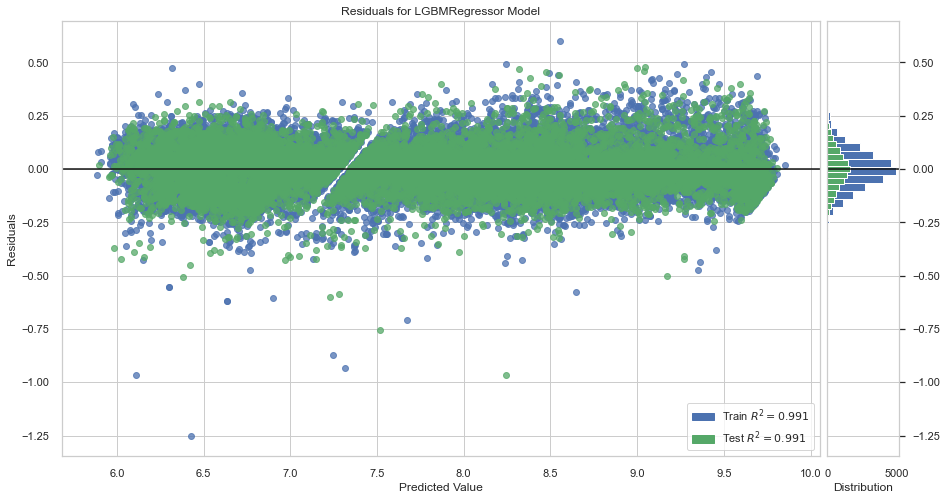

In [268]:
model = create_model("lightgbm")
plot_model(model, plot="residuals")

In [269]:
best_model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [270]:
model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [271]:
predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0756,0.0098,0.0991,0.9905,0.0116,0.0100


,carat,depth,table,cut_1,cut_2,cut_3,cut_4,cut_5,color_1,color_2,...,clarity_1,clarity_2,clarity_3,clarity_4,clarity_5,clarity_6,clarity_7,clarity_8,price,Label
0,-0.582852,-0.033027,-1.101269,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.127,7.153623
1,-0.940291,0.177809,0.696322,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.809,6.691733
2,-0.835162,0.037252,-1.101269,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.898,6.765615
3,-0.477723,-0.103306,-0.651871,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.523,7.543247
4,-0.162335,0.177809,1.145719,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.768,7.809375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12124,-1.045420,0.248088,-0.202473,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.760,6.769150
12125,-1.045420,0.248088,-2.000064,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.045,6.208977
12126,0.026897,-0.946652,0.696322,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.733,7.722261
12127,1.919221,-0.103306,0.696322,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.301,9.337301


In [272]:
final_lightgbm = finalize_model(best_model)

In [273]:
predict_model(final_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0734,0.0092,0.0961,0.9911,0.0113,0.0097


,carat,depth,table,cut_1,cut_2,cut_3,cut_4,cut_5,color_1,color_2,...,clarity_1,clarity_2,clarity_3,clarity_4,clarity_5,clarity_6,clarity_7,clarity_8,price,Label
0,-0.582852,-0.033027,-1.101269,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.127,7.153554
1,-0.940291,0.177809,0.696322,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.809,6.703894
2,-0.835162,0.037252,-1.101269,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.898,6.761102
3,-0.477723,-0.103306,-0.651871,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.523,7.557800
4,-0.162335,0.177809,1.145719,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.768,7.808232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12124,-1.045420,0.248088,-0.202473,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.760,6.772535
12125,-1.045420,0.248088,-2.000064,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.045,6.191409
12126,0.026897,-0.946652,0.696322,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.733,7.729830
12127,1.919221,-0.103306,0.696322,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.301,9.327891


In [274]:
unseen_predictions = predict_model(final_lightgbm, data=df_test)
unseen_predictions.head()

,carat,cut,color,clarity,depth,table,Label
0,-1.023184,5,2,3,-0.886269,0.235589,6.081875
1,0.941880,4,2,3,0.803891,1.130774,8.589802
2,1.838975,4,7,3,0.170081,0.683182,9.494557
3,-0.104730,4,7,2,-0.815845,-0.659595,7.842593
4,1.497225,1,6,2,2.141935,-1.107188,8.965113


In [275]:
df_test2 ['price'] = unseen_predictions["Label"]
df_submission = df_test2[["id", "price"]] 

In [276]:
df_submission.sample()

,id,price
4319,4319,6.485118


In [278]:
df_submission.to_csv("my_submission10.csv", index=False)

# Vtreat

In [ ]:
unsupervised_transform = vtreat.UnsupervisedTreatment()
data = unsupervised_transform.fit_transform(data)
data_2 = unsupervised_transform.fit_transform(data_2)